In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("ggplot")

In [2]:
tickers = ["C", "JPM", "V", "MA", "BAC","WFC","GS","PGR","AXP","SPGI"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start = "2020-01-01", end = "2024-12-31", auto_adjust = False)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

financial_sector_index = pd.concat(groups)
financial_sector_index


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,C,66.132507,81.230003,81.260002,80.029999,80.129997,12728900
2020-01-03,C,64.886856,79.699997,80.519997,79.449997,79.800003,12437400
2020-01-06,C,64.683311,79.449997,79.550003,78.720001,78.720001,10059500
2020-01-07,C,64.121567,78.760002,79.300003,78.730003,79.290001,10469100
2020-01-08,C,64.610062,79.360001,80.000000,78.680000,78.769997,11292400
...,...,...,...,...,...,...,...
2024-12-23,SPGI,496.429199,498.250000,498.899994,488.529999,490.019989,1622300
2024-12-24,SPGI,502.905426,504.750000,504.750000,498.220001,499.790009,432200
2024-12-26,SPGI,502.935333,504.779999,506.029999,499.989990,502.070007,563100


In [3]:
fn_index = financial_sector_index.reset_index().pivot(index="Date", columns="Ticker", values="Adj Close")
fn_index.index = pd.to_datetime(fn_index.index, dayfirst=True)
fn_index.sort_index(inplace=True)

portfolio = fn_index.columns[:10]
fn_index[portfolio]

Ticker,AXP,BAC,C,GS,JPM,MA,PGR,SPGI,V,WFC
Date,,,,,,,,,,
2020-01-02,117.229332,31.092319,66.132507,205.282959,120.733551,294.123230,65.080063,265.305725,183.872040,46.566490
2020-01-03,116.064964,30.446737,64.886856,202.882507,119.140312,291.253632,65.071297,264.417725,182.409744,46.280598
2020-01-06,115.561966,30.403111,64.683311,204.958786,119.045570,292.029144,66.253296,266.451599,182.015213,46.003361
2020-01-07,114.956490,30.202463,64.121567,206.307953,117.021759,291.040283,65.747284,268.304077,181.534210,45.622169
2020-01-08,116.940582,30.507807,64.610062,208.296677,117.934616,296.175598,66.135818,272.152252,184.641708,45.760784
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,297.112762,43.359241,68.740494,565.146667,235.713242,527.345154,236.374634,496.429199,316.162048,69.810455
2024-12-24,301.746460,43.843319,69.952347,577.038086,239.589218,534.074524,238.561752,502.905426,319.580597,70.849594
2024-12-26,302.273468,44.011265,70.297188,575.493469,240.409912,534.513184,238.512726,502.935333,319.839752,71.017845


In [4]:
print("Duplicates:", fn_index.reset_index().Date.duplicated().sum())
print("Missing:", fn_index.isnull().sum().sum())

Duplicates: 0
Missing: 0


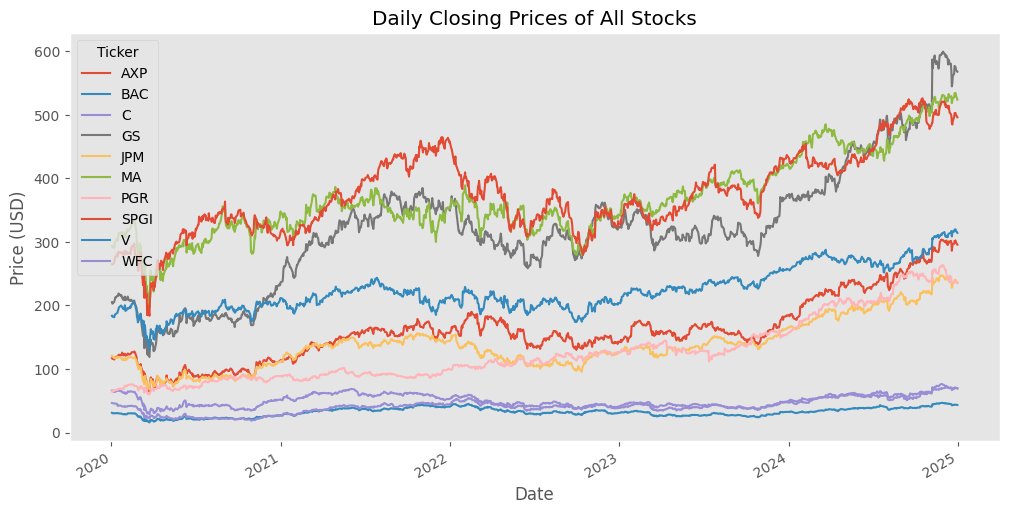

In [5]:
plt.figure(figsize=(12, 6))
fn_index.plot(ax=plt.gca())
plt.title("Daily Closing Prices of All Stocks")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(title="Ticker")
plt.grid(True, which='major', linestyle='--', alpha=0.0)

plt.show()

In [6]:
returns = fn_index.pct_change().dropna()
returns.apply(lambda x: x * 100)


Ticker,AXP,BAC,C,GS,JPM,MA,PGR,SPGI,V,WFC
Date,,,,,,,,,,
2020-01-03,-0.993239,-2.076340,-1.883569,-1.169338,-1.319632,-0.975645,-0.013470,-0.334708,-0.795279,-0.613945
2020-01-06,-0.433377,-0.143289,-0.313692,1.023390,-0.079521,0.266267,1.816468,0.769190,-0.216288,-0.599035
2020-01-07,-0.523941,-0.659957,-0.868454,0.658263,-1.700031,-0.338617,-0.763754,0.695240,-0.264265,-0.828616
2020-01-08,1.725951,1.010989,0.761826,0.963959,0.780075,1.764469,0.590951,1.434259,1.711798,0.303832
2020-01-09,1.808178,0.171586,0.907261,2.035671,0.365107,1.311004,1.024761,1.603441,0.692986,-0.170366
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.050232,-0.633917,0.838260,0.826716,0.332484,0.176131,0.433384,1.309450,-0.154231,0.284341
2024-12-24,1.559575,1.116434,1.762939,2.104130,1.644361,1.276085,0.925276,1.304562,1.081265,1.488515
2024-12-26,0.174653,0.383059,0.492966,-0.267680,0.342542,0.082135,-0.020551,0.005947,0.081092,0.237476


In [7]:
cumulative_returns = returns.cumsum() * 100
cumulative_returns

Ticker,AXP,BAC,C,GS,JPM,MA,PGR,SPGI,V,WFC
Date,,,,,,,,,,
2020-01-03,-0.993239,-2.076340,-1.883569,-1.169338,-1.319632,-0.975645,-0.013470,-0.334708,-0.795279,-0.613945
2020-01-06,-1.426616,-2.219629,-2.197260,-0.145948,-1.399153,-0.709378,1.802998,0.434482,-1.011567,-1.212980
2020-01-07,-1.950557,-2.879585,-3.065714,0.512314,-3.099184,-1.047995,1.039244,1.129722,-1.275833,-2.041596
2020-01-08,-0.224606,-1.868596,-2.303888,1.476273,-2.319110,0.716474,1.630196,2.563980,0.435965,-1.737764
2020-01-09,1.583573,-1.697010,-1.396627,3.511944,-1.954002,2.027478,2.654957,4.167421,1.128951,-1.908130
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,129.487480,64.945805,42.150954,128.531095,93.168800,82.201931,147.736213,84.122449,73.541087,78.624436
2024-12-24,131.047055,66.062239,43.913893,130.635225,94.813161,83.478015,148.661489,85.427011,74.622352,80.112951
2024-12-26,131.221708,66.445298,44.406859,130.367544,95.155703,83.560150,148.640938,85.432958,74.703444,80.350427


In [8]:
tickers

['C', 'JPM', 'V', 'MA', 'BAC', 'WFC', 'GS', 'PGR', 'AXP', 'SPGI']

In [9]:
roll_mean_price = fn_index.apply(lambda x: x.rolling(20).mean()) 
sd_price = fn_index.apply(lambda x: x.rolling(20).std())

In [10]:
roll_mean_price

Ticker,AXP,BAC,C,GS,JPM,MA,PGR,SPGI,V,WFC
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,299.202402,45.313831,69.808997,582.221356,240.074223,526.470801,248.362550,508.605533,312.537180,72.091124
2024-12-24,299.115396,45.172697,69.821312,581.366510,239.679703,526.924915,247.252323,507.865746,312.908936,71.828369
2024-12-26,299.036842,45.027680,69.900132,580.312753,239.342037,527.307245,246.034702,507.009885,313.361920,71.551760


In [11]:
sd_price

Ticker,AXP,BAC,C,GS,JPM,MA,PGR,SPGI,V,WFC
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,4.296749,1.273078,1.226172,16.400208,5.499748,4.028251,10.347774,11.626651,2.910990,2.673834
2024-12-24,4.222407,1.271747,1.226321,16.190779,5.216268,4.351742,10.135926,11.487330,3.306259,2.511975
2024-12-26,4.143675,1.227620,1.202289,15.831126,4.916296,4.670571,9.610771,11.164693,3.606250,2.256254


In [12]:
def lowBB(SMA, SD):
    calc = SMA - 2 * SD
    return calc

def highBB(SMA, SD):
    calc = SMA + 2 * SD
    return calc

In [13]:
low_BB = lowBB(roll_mean_price, sd_price) 
high_BB = highBB(roll_mean_price, sd_price) 

In [14]:
print(low_BB)

Ticker             AXP        BAC          C          GS         JPM  \
Date                                                                   
2020-01-02         NaN        NaN        NaN         NaN         NaN   
2020-01-03         NaN        NaN        NaN         NaN         NaN   
2020-01-06         NaN        NaN        NaN         NaN         NaN   
2020-01-07         NaN        NaN        NaN         NaN         NaN   
2020-01-08         NaN        NaN        NaN         NaN         NaN   
...                ...        ...        ...         ...         ...   
2024-12-23  290.608904  42.767676  67.356652  549.420941  229.074728   
2024-12-24  290.670582  42.629203  67.368670  548.984952  229.247167   
2024-12-26  290.749491  42.572440  67.495554  548.650502  229.509446   
2024-12-27  290.752325  42.530853  67.564795  548.020234  229.762758   
2024-12-30  290.503296  42.437852  67.526871  547.647874  230.017825   

Ticker              MA         PGR        SPGI           V     

In [15]:
print(high_BB)

Ticker             AXP        BAC          C          GS         JPM  \
Date                                                                   
2020-01-02         NaN        NaN        NaN         NaN         NaN   
2020-01-03         NaN        NaN        NaN         NaN         NaN   
2020-01-06         NaN        NaN        NaN         NaN         NaN   
2020-01-07         NaN        NaN        NaN         NaN         NaN   
2020-01-08         NaN        NaN        NaN         NaN         NaN   
...                ...        ...        ...         ...         ...   
2024-12-23  307.795900  47.859987  72.261341  615.021771  251.073719   
2024-12-24  307.560210  47.716192  72.273954  613.748068  250.112238   
2024-12-26  307.324193  47.482920  72.304709  611.975004  249.174628   
2024-12-27  307.003168  47.211761  72.318228  610.004657  248.068997   
2024-12-30  306.521347  46.975080  72.308861  607.206612  246.785608   

Ticker              MA         PGR        SPGI           V     

In [ ]:
SMA = roll_mean_price

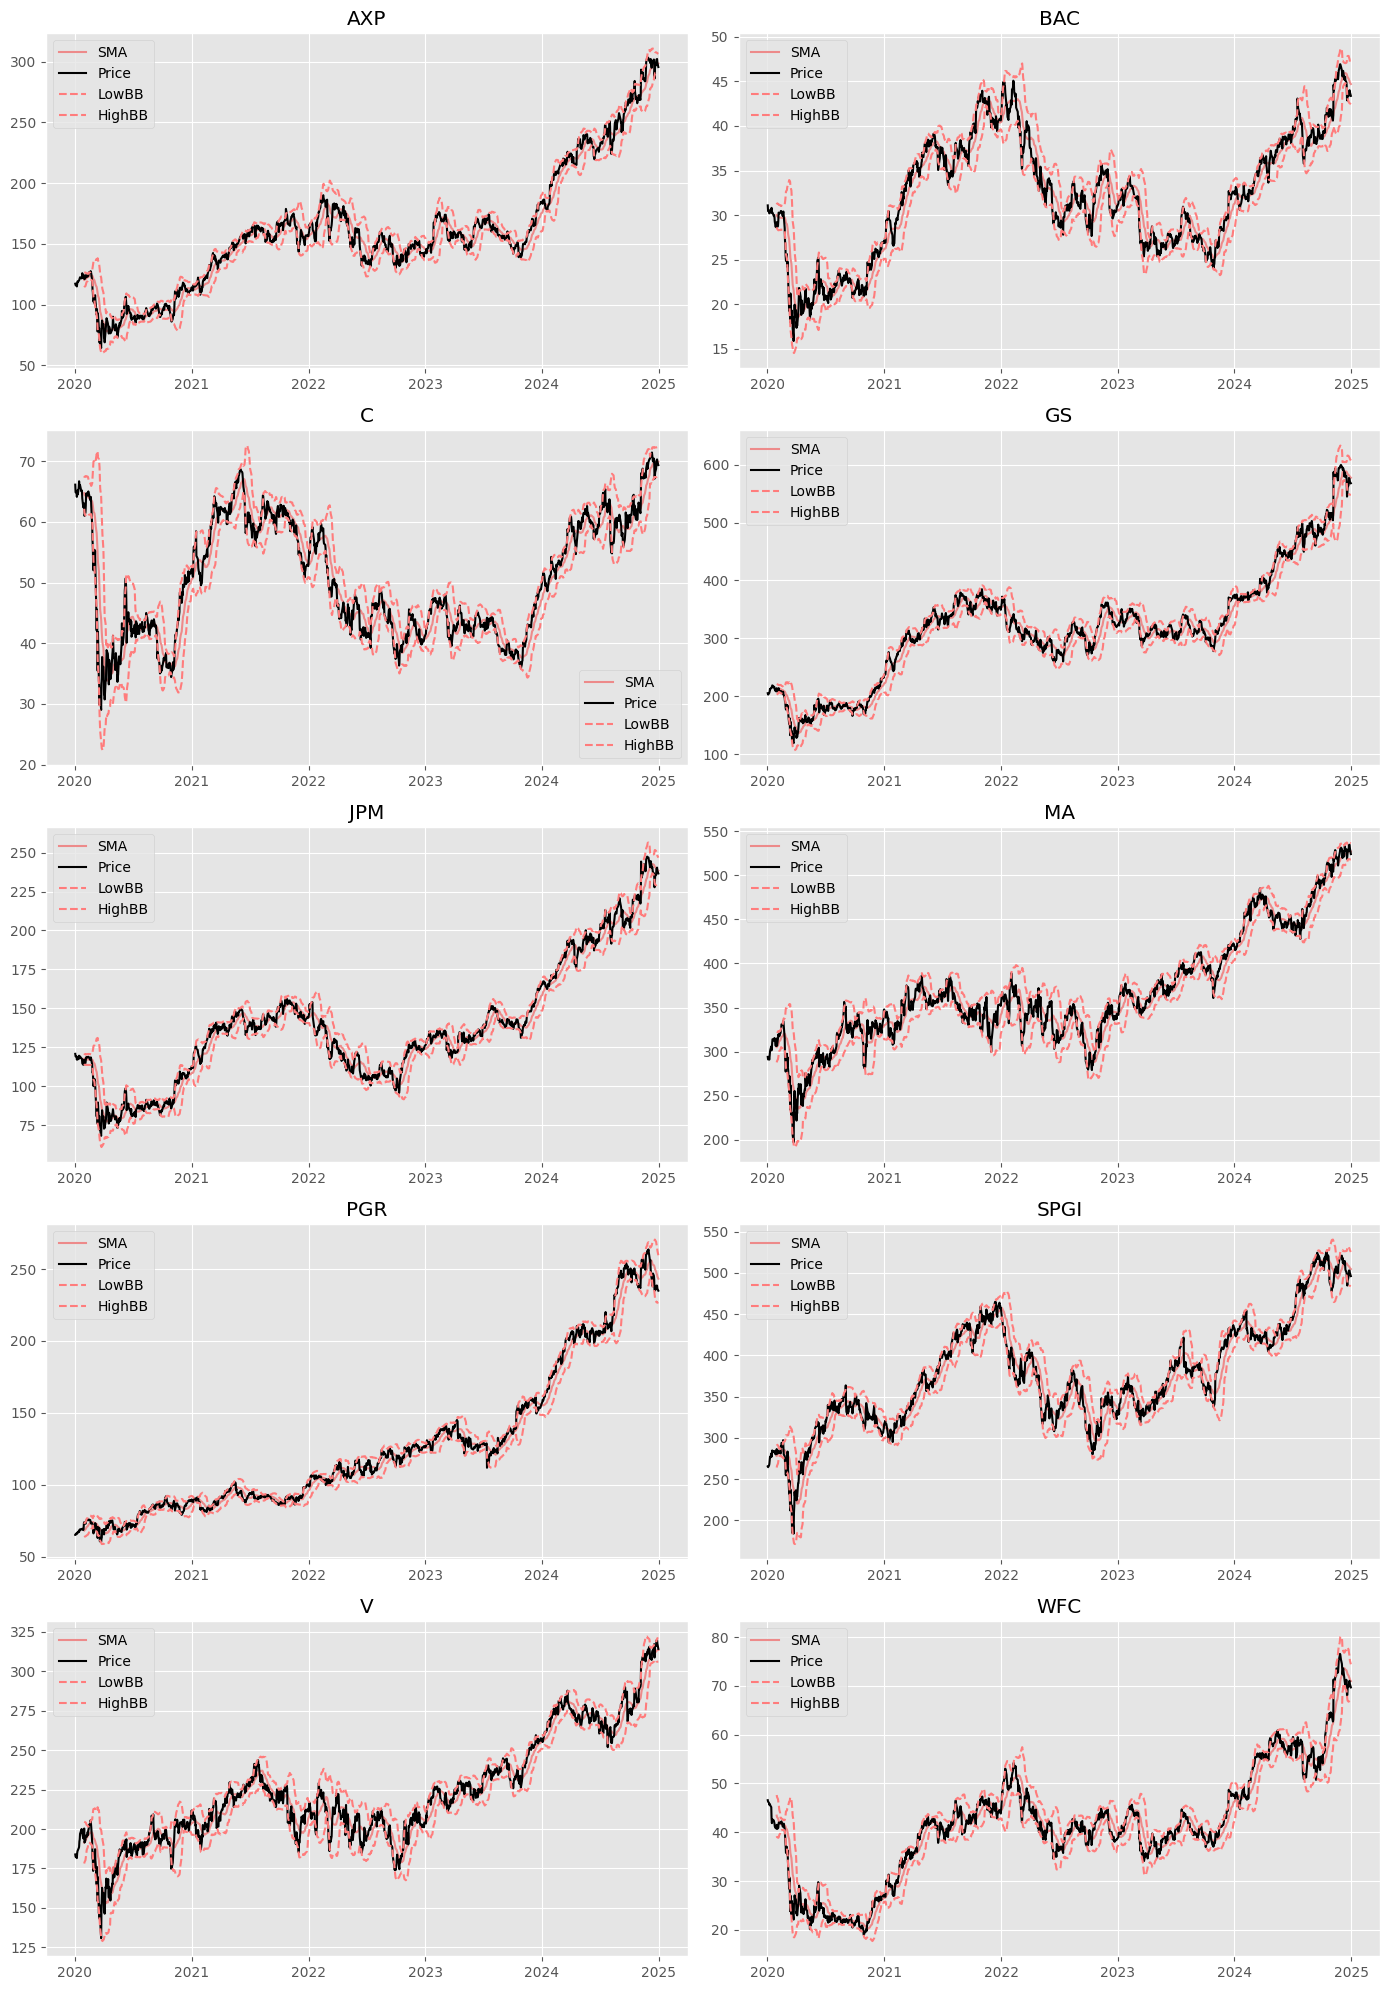

In [25]:
fig, axs = plt.subplots(5, 2, figsize=(14, 20))
axs = axs.flatten()  

for i in range(10):
    axs[i].plot(SMA.iloc[:, i], label='SMA', color = "#ED8A8A")
    axs[i].plot(fn_index.iloc[:, i], label='Price',color = "black" )
    axs[i].plot(low_BB.iloc[:, i], label='LowBB', color = "#FF7C7C", linestyle = "--")
    axs[i].plot(high_BB.iloc[:, i], label='HighBB',color = "#FF7C7C", linestyle = "--")
    axs[i].set_title(SMA.columns[i])
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [27]:
#Initialize signal and position trackers
signals = pd.DataFrame(index=fn_index.index, columns=fn_index.columns)
positions = pd.Series(0, index=fn_index.columns)  # 1 = long, -1 = short, 0 = no position
entry_prices = pd.Series(np.nan, index=fn_index.columns)  # store entry prices

# Initialize return trackers
daily_returns = pd.DataFrame(0.0, index=fn_index.index, columns=fn_index.columns)
cumulative_returns = pd.DataFrame(0.0, index=fn_index.index, columns=fn_index.columns)

# Loop through each day
for date in fn_index.index:
    for stock in fn_index.columns:
        price = fn_index.loc[date, stock]
        sma = SMA.loc[date, stock]
        low = low_BB.loc[date, stock]
        high = high_BB.loc[date, stock]
        position = positions[stock]
        signal = None
        daily_ret = 0.0

        if position == 0:
            if price < low:
                signal = 'BUY'
                positions[stock] = 1
                entry_prices[stock] = price
            elif price > high:
                signal = 'SELL'
                positions[stock] = -1
                entry_prices[stock] = price

        elif position == 1:  # long position
            if price >= sma:
                signal = 'CLOSE_LONG'
                entry = entry_prices[stock]
                if pd.notna(entry) and entry != 0:
                    daily_ret = (price - entry) / entry
                positions[stock] = 0
                entry_prices[stock] = np.nan

        elif position == -1:  # short position
            if price <= sma:
                signal = 'CLOSE_SHORT'
                entry = entry_prices[stock]
                if pd.notna(entry) and entry != 0:
                    daily_ret = (entry - price) / entry
                positions[stock] = 0
                entry_prices[stock] = np.nan

        signals.loc[date, stock] = signal
        daily_returns.loc[date, stock] = daily_ret

# Cumulative return per stock
cumulative_returns = daily_returns.cumsum()

In [28]:
daily_returns

Ticker,AXP,BAC,C,GS,JPM,MA,PGR,SPGI,V,WFC
Date,,,,,,,,,,
2020-01-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-01-08,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2024-12-24,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2024-12-26,0.0,0.0,0.0,0.0,0.055433,0.0,0.0,0.0,0.0,0.0
